In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
from seaborn import distplot, heatmap, clustermap
from scipy.stats import spearmanr, pearsonr, pearson3
from pySankey import sankey

In [84]:
auc = pd.read_table('auc_mtx_mac.txt', index_col=0, header=0 )
cell_info = pd.read_table( 'cellInfo2.txt' )
cell_info2 = cell_info[ cell_info.index.isin( auc.columns ) ]

In [92]:
auc.columns

Index(['GF_TGGATCGACCGC', 'GF_AGCCGTCTTGGG', 'GF_CTGCCAGGGGTG',
       'WT_ACTTGCTCATTG', 'GF_TTTTTGTCAGAG', 'WT_TTCGAAAGGGAC',
       'GF_CGGGAAAGCGCC', 'GF_CCGGGATTACTT', 'GF_TCGGAGGGTGGG',
       'GF_GGCATTGAGTGT',
       ...
       'WT_CCATGTACCCCA', 'GF_TTGTCGCATGCN', 'GF_GGAAGGCTACAG',
       'WT_CTCGTAAAACTG', 'WT_ATTATGCGATGA', 'GF_CTGTTTCTTATA',
       'GF_ACTTGGCGGTCA', 'WT_CTAGTGAAAGTG', 'WT_TCGTTCCCACGT',
       'GF_CGAACCCTGCCC'],
      dtype='object', length=296)

In [86]:
aucz = ((auc.transpose() - auc.mean(1))/auc.std(1)).transpose()

In [90]:
aucz

,GF_TGGATCGACCGC,GF_AGCCGTCTTGGG,GF_CTGCCAGGGGTG,WT_ACTTGCTCATTG,GF_TTTTTGTCAGAG,WT_TTCGAAAGGGAC,GF_CGGGAAAGCGCC,GF_CCGGGATTACTT,GF_TCGGAGGGTGGG,GF_GGCATTGAGTGT,...,WT_CCATGTACCCCA,GF_TTGTCGCATGCN,GF_GGAAGGCTACAG,WT_CTCGTAAAACTG,WT_ATTATGCGATGA,GF_CTGTTTCTTATA,GF_ACTTGGCGGTCA,WT_CTAGTGAAAGTG,WT_TCGTTCCCACGT,GF_CGAACCCTGCCC
Tfdp1_extended (133g),0.328464,-1.050428,-0.594866,-1.317281,-2.257369,-0.013800,0.002776,0.646684,-0.631660,-0.545684,...,-0.632207,-0.207063,-1.816743,1.537226,-0.209614,-0.049684,0.743407,-0.480110,-0.211982,0.006419
Nfyb_extended (47g),0.590177,-0.700313,0.712134,0.809567,-0.950855,0.381723,0.570624,-1.179524,0.776426,0.207404,...,-0.406688,0.195474,-1.858903,-1.658403,0.166310,0.896726,0.298541,-0.518703,-0.063685,0.139135
Nfyb (28g),0.521582,-0.247497,1.431461,0.165601,-1.764404,0.199694,0.439671,-1.271165,0.391853,1.260111,...,-0.353317,0.557889,-1.972060,-0.821761,0.044727,0.127523,0.568073,-0.323652,-0.014161,0.333851
E2f2_extended (187g),-1.383219,-0.013438,-2.144545,0.632715,0.587189,1.482538,0.051896,0.767696,-0.039636,-0.380364,...,-0.721411,0.595176,0.656676,0.299654,-0.380364,-1.149517,0.156047,-0.433078,-0.783710,2.240989
E2f2 (147g),-1.187652,-1.063722,-2.143045,0.763594,0.389767,1.942196,-0.277988,1.038992,0.131369,-0.069740,...,-1.224371,0.560106,0.451307,-0.020440,-0.190099,-1.052503,0.145309,-0.810084,-0.630226,1.763697
E2f8_extended (36g),-0.933751,-0.501183,1.502090,-0.282457,1.007106,2.564785,-0.296568,0.917553,-0.903357,-1.062924,...,-0.051247,-0.166852,1.526513,0.608731,-0.975542,-1.402140,1.838049,-0.527778,0.031250,-0.929409
E2f8 (19g),-0.778557,-0.778557,-0.032484,0.273191,0.347912,2.038180,-0.778557,-0.778557,-0.778557,-0.778557,...,-0.778557,1.093985,1.225312,0.312816,0.329798,-0.778557,2.178564,0.355837,-0.687986,-0.687986
Sin3a_extended (770g),1.193100,0.032502,0.906100,-0.421538,1.668120,0.709998,-1.193747,0.739863,-0.917338,-0.649511,...,-1.203836,0.106034,-0.697796,-0.251135,0.294305,-0.792108,-0.138102,-1.824916,0.722898,-0.659148
Sin3a (334g),0.646874,-0.018893,-0.005214,-0.211938,1.673957,-0.345195,-0.175721,0.770324,-0.544263,-0.309408,...,-0.812669,0.360575,-1.054234,0.330035,-0.397844,-1.771790,1.019890,-1.314984,0.226802,-0.116534
Mxi1_extended (2236g),-0.846633,1.046967,-1.136606,-1.938478,-1.224609,1.050765,0.588351,0.968148,0.493372,-0.258433,...,-0.570029,-2.060465,-0.843882,-0.087116,-2.472620,-1.496214,-0.918477,0.095207,-1.435065,-0.822607


In [93]:
c2t = cell_info2.CellType
c2t

GF_TGGATCGACCGC     1
GF_AGCCGTCTTGGG     1
GF_CTGCCAGGGGTG     1
WT_ACTTGCTCATTG     1
GF_TTTTTGTCAGAG     1
WT_TTCGAAAGGGAC     1
GF_CGGGAAAGCGCC     1
GF_CCGGGATTACTT     1
GF_TCGGAGGGTGGG     1
GF_GGCATTGAGTGT     1
GF_GTGTCTCGTCAN     1
GF_TCGAGGATCGTC     1
GF_ATTCTGTGGGGG     1
GF_CCAACTAGGGCN     1
GF_ATAACGTGACAC     1
GF_TGCCAAGGCGCT     1
GF_GGACCTGGGACC     1
GF_CCTACGATTCTT     1
GF_CTAAAGGAGCAC     1
WT_TAGCTTGCAACA     1
WT_GAAACCTTGCAG     1
WT_CTCCCTTTGGTG     1
WT_AGGACAAGCAGT     1
WT_CGGGTCCTCTGA     1
WT_GGCCCGGATCGT     1
WT_CATAACATGTCG     1
WT_TTCAATTGACGC     1
WT_GGCAATGATCAA     1
WT_GAGTAGACCCGT     1
WT_CACGTGTATTAT     1
                   ..
GF_CTCCAATAATCG     7
GF_TTTTCGTCTAAN     7
GF_ACGCTATGAGTC     7
GF_AGTCTCTGGCGN     7
GF_CCCTTCGTAAAG     7
GF_GCGGTGGTGTGG     7
GF_TTCGTCGAAATG     7
GF_CGTCTCACCCTT     7
GF_GACAGGAAATTG     7
GF_AGACAGTCGTGG     7
GF_GTCAGTGATAAC     7
GF_GTCAGCATGATT     7
WT_GCCTGCACCAGC     7
WT_GCCTAACCACTA     7
WT_TCAATAG

In [88]:
r2t = pd.read_table( 'mycl_mac_table.txt').x

In [89]:
for (cellid,regulonid),v in ((aucz > 2).unstack()).iteritems():
    if v :
        print( ("c%s"%c2t[cellid], "m%s"%r2t[regulonid]) )

KeyError: 'Foxn2_extended (14g)'

In [27]:
from collections import Counter
c = []

for (cellid,regulonid),v in ((aucz > 2).unstack()).iteritems():
    if v :
        c.append( ("c%s"%c2t[cellid], "m%s"%r2t[regulonid]) )

KeyError: 'Foxn2_extended (14g)'

In [8]:
df = pd.DataFrame(c)

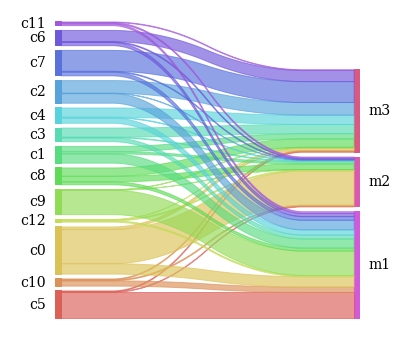

In [11]:
sankey.sankey( df[0], df[1])